In [228]:
import numpy as np
import h5py
from math import *
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
arrays = {}
f = h5py.File('points2D_Set1.mat')
for k, v in f.items():
    arrays[k] = np.array(v)

3. (15 points) PCA and Hyperplane Fitting.
Consider the observed set of points of the form (x, y) ∈ R<sup>2</sup> in the file "points2D_Set1.mat". Assume
each observation (x, y) is drawn independently from the joint probability density function P(X, Y) of random variables X and Y. For this question, you cannot use the functions mean(), cov(), and pca() in Matlab.<br>
a) (5 points) How can principal component analysis (PCA) be used to best approximate a linear relationship between random variables X and Y . Describe the method clearly, using appropriate mathematical descriptions for clarity. Your description should be clear enough to lead to a programmable implementation.

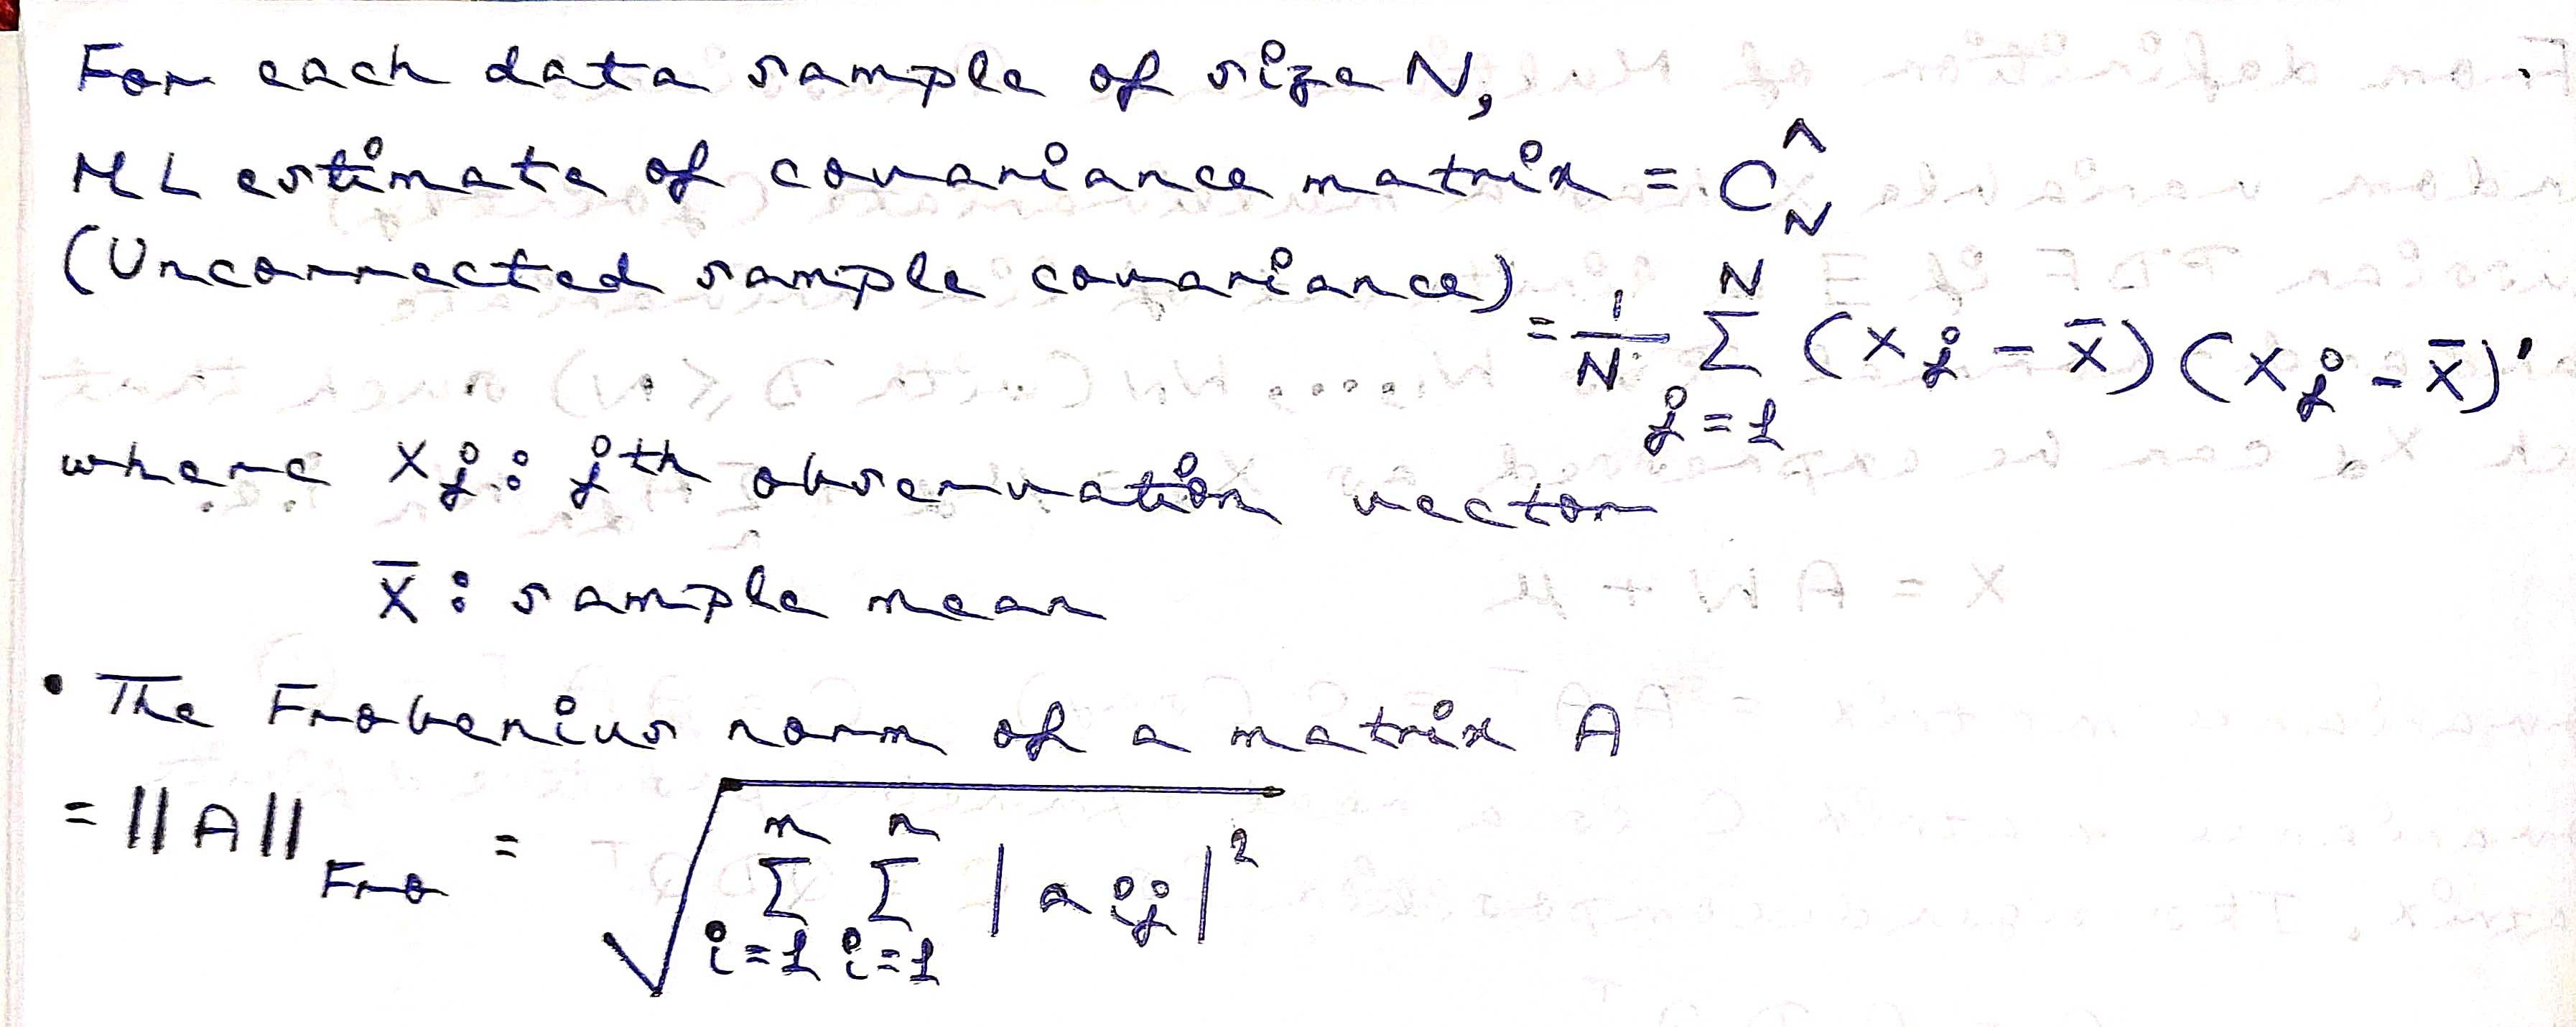

In [230]:
def generate_sample(X,Y):
    sample =  []
    for i in range(len(X[0])):
        s = np.array([[X[0][i]] , [Y[0][i]]])
        sample.append(s)
    return sample

#ML estimate for mean
def compute_sample_mean(sample):
    n = len(sample)
    sample_mean = sum(sample)/n
    return sample_mean

#ML estimate for covariance
def compute_sample_covariance(sample):
    sample_mean = compute_sample_mean(sample)
    n = len(sample)
    s = np.zeros((2,2))
    z = [] #list for storing intermediate values
    for j in range(n):
        d = sample[j] - sample_mean
        z.append(np.matmul(d,np.transpose(d)))
    sample_covariance = sum(z)/n
    return sample_covariance

b) (5 points) Show a scatter plot of the points. Overlay on the scatter plot, the graph of a line showing
the linear relationship between Y and X.

In [231]:
def line(point,e,q):
    x , y = point
    l = 2 * sqrt(e) #length
    angle = atan(q[0]/q[1])
    startx = x - l * cos(angle)
    starty = y - l * sin(angle)
    endx = x + l * cos(angle)
    endy = y + l * sin(angle)
    x_points = np.linspace(start=startx, stop=endx, num=100)
    y_points = np.linspace(start=starty, stop=endy, num=100)
    return (x_points,y_points)

In [232]:
X = arrays['x']
Y = arrays['y']
sample = generate_sample(X,Y)
mean = compute_sample_mean(sample)
C = compute_sample_covariance(sample)

In [233]:
# Eigen decomposition of covariance matrix
eigenvalues,Q = np.linalg.eig(C)

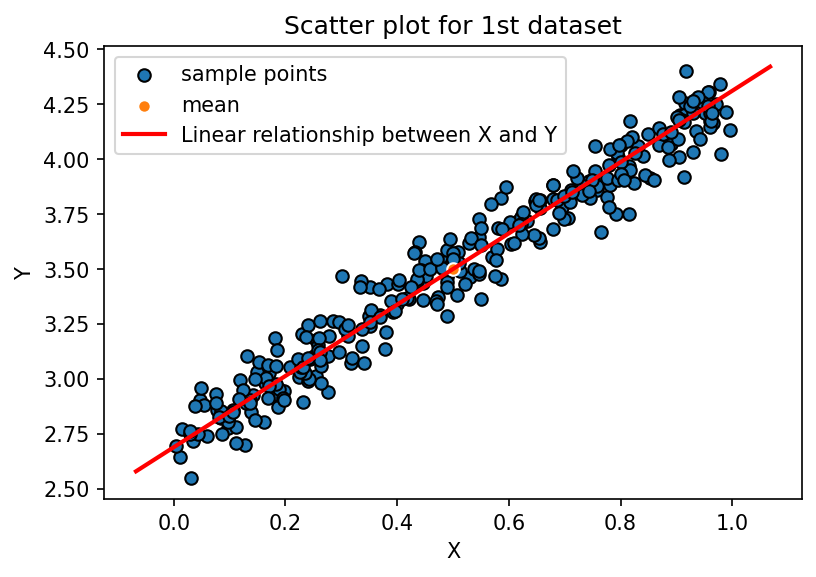

<Figure size 432x288 with 0 Axes>

In [234]:
plt.figure(dpi=150)
plt.title('Scatter plot for 1st dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X,Y,edgecolor ="black",label='sample points')
plt.scatter(mean[0][0],mean[1][0],edgecolor ="white",label='mean')

#Plotting a line passing through the mean in the direction of the principal mode of variation
x1,x2 = line(mean,max(eigenvalues),Q[0]) 
plt.plot(x1,x2,color='red',linewidth=2.0,label='Linear relationship between X and Y')

plt.legend()

plt.show()
plt.savefig('Plot for 1st dataset.png')

c) (5 points) Repeat the same analysis for the set of points in "points2D_Set2.mat". Show a scatter plot of the points. Overlay on the scatter plot, the graph of a line showing the linear relationship between Y and X. Compared to the result on the other set of points, justify the quality of the approximation resulting in this question using logical arguments.

In [235]:
arrays1 = {}
f = h5py.File('points2D_Set2.mat')
for k, v in f.items():
    arrays1[k] = np.array(v)

In [236]:
X = arrays1['x']
Y = arrays1['y']
sample = generate_sample(X,Y)
mean = compute_sample_mean(sample)
C = compute_sample_covariance(sample)

In [237]:
# Eigen decomposition of covariance matrix
eigenvalues,Q = np.linalg.eigh(C)
eigenvalues,Q

(array([0.09762564, 1.10367047]),
 array([[ 0.01620885, -0.99986863],
        [-0.99986863, -0.01620885]]))

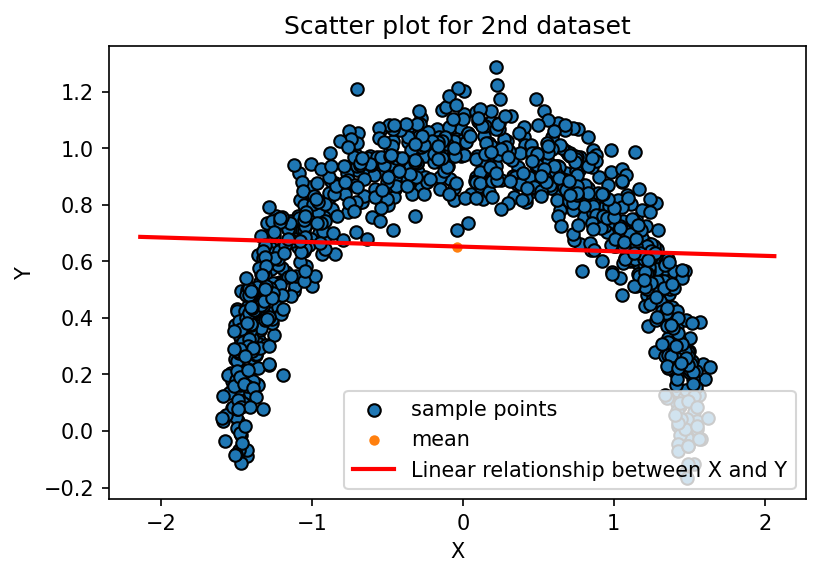

<Figure size 432x288 with 0 Axes>

In [238]:
plt.figure(dpi=150)
plt.title('Scatter plot for 2nd dataset')
plt.xlabel('X')
plt.ylabel('Y')
plt.scatter(X,Y,edgecolor ="black",label='sample points')
plt.scatter(mean[0][0],mean[1][0],edgecolor ="white",label='mean')

#Plotting a line passing through the mean in the direction of the principal mode of variation
x1,x2 = line(mean,max(eigenvalues),Q[0]) 
plt.plot(x1,x2,color='red',linewidth=2.0,label='Linear relationship between X and Y')

plt.legend()

plt.show()
plt.savefig('Plot for 2nd dataset.png')

As observed from the scatter plot of the 1st dataset, the relationship between X and Y is linear.As observed from the scatter plot of the 2nd dataset, the relationship between X and Y is quadratic.Now PCA fits a linear hyperplane to the data and hence is unable to capture the quadratic relation between X and Y. Thus the quality of the approximation resulting in this case is poor as compared to the result on the other set of points.